In [22]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import data_exploration as de
import data_cleanup as dc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import domain_comparison as doc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
aa = pd.read_csv('../DMS_data/aminoacids.csv')

df: pd.DataFrame = dc.norm(pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'))
norm_frame = dc.aufteilung_mut_pos(dc.norm(df))

In [24]:
# Saving the different domains for better accessibility

#Transactivation Domain 1
t1_start = 1
t1_end = 43

#Transactivation Domain 2
t2_start = 44
t2_end = 63

#Proline-rich Region
pr_start = 64
pr_end = 92

#DNA Binding Domain
dna_start = 102
dna_end = 292

#Tetramerization Domain
tetra_start = 320
tetra_end = 355

#Regulatory Domain
reg_start = 356
reg_end = 393



t1_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t1_start, end= t1_end)))
t1_list = doc.slice_domain(df, start= t1_start, end= t1_end)
t1_dist = de.dms_distance_matrix(t1_list)

t2_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t2_start, end= t2_end)))
t2_list = doc.slice_domain(df, start= t2_start, end= t2_end)
t2_dist = de.dms_distance_matrix(t2_list)

pr_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= pr_start, end= pr_end)))
pr_list = doc.slice_domain(df, start= pr_start, end= pr_end)
pr_dist = de.dms_distance_matrix(pr_list)

dna_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= dna_start, end= dna_end)))
dna_list = doc.slice_domain(df, start= dna_start, end= dna_end)
dna_dist = de.dms_distance_matrix(dna_list)

tetra_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= tetra_start, end= tetra_end)))
tetra_list = doc.slice_domain(df, start= tetra_start, end= tetra_end)
tetra_dist = de.dms_distance_matrix(tetra_list)

reg_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= reg_start, end= reg_end)))
reg_list = doc.slice_domain(df, start= reg_start, end= reg_end)
reg_dist = de.dms_distance_matrix(reg_list)

# to be more efficient for greater amounts of domains: Transfer into a dictionary

In [25]:
t2_dist.shape
## some domains don't contain all substitutions, so the distance matrices are of lower dimension than 20x20. Thus, there cannot be 20 datapoints in the plots created further down.

(13, 13)

In [26]:
### EDIT FOR THE DOMAIN AT QUESTION ###

#Variable containing the domain, the plots are created for
domain = dna_dist

#Variable to print correct plot titles
title = "DNA-binding domain of p53"


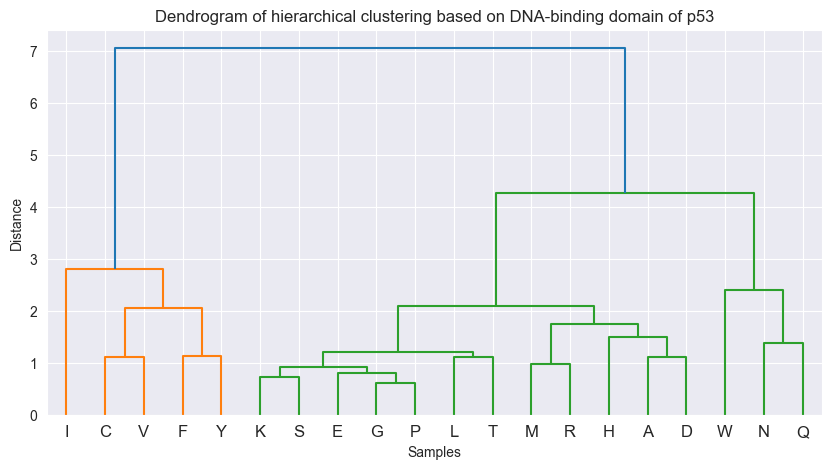

In [27]:
de.plot_hier_clust(domain, title = title)

In [28]:
best_clusters = de.determine_clusters_silhouette(domain)
print(best_clusters)

2


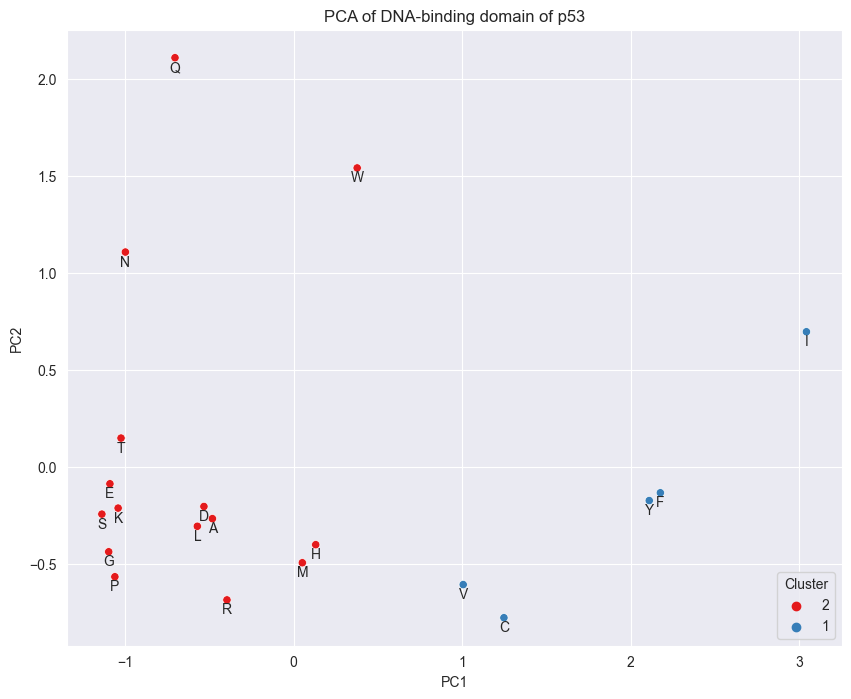

In [29]:
de.pca_clustering_plot(domain, optimal_num_cluster= best_clusters, title= title)